### Support_Vector_Machine

SVC(kernel='linear')
Train_data Accuracy: 0.52
Test_data Accuracy: 0.52
Confusion Matrix:
 [[ 18  98]
 [ 20 110]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.16      0.23       116
           1       0.53      0.85      0.65       130

    accuracy                           0.52       246
   macro avg       0.50      0.50      0.44       246
weighted avg       0.50      0.52      0.45       246



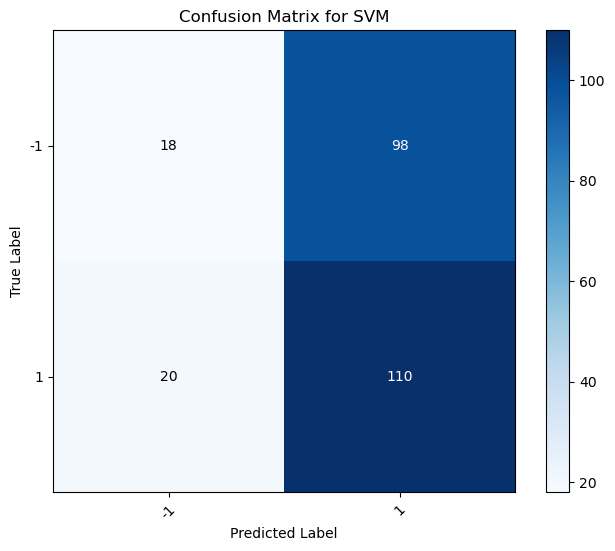

CV Accuracy Score: [0.52845528 0.50406504 0.51219512 0.51219512 0.50406504 0.51219512
 0.53658537 0.50819672 0.54918033 0.52459016]
CV Accuracy: 0.519 +/- 0.014


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load data
INFOSYS = pd.read_csv("INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

iplot(plot)

# Feature engineering
INFOSYS['Open-Close'] = INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low'] = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()

# Define features and target variable
X = INFOSYS[['Open-Close', 'High-Low']]
Y = np.where(INFOSYS['Adj Close'].shift(-1) > INFOSYS['Adj Close'], 1, -1)

# Split data into training and testing sets
split_percentage = 0.8
split = int(split_percentage * len(INFOSYS))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

# Create and train the SVM model
model = SVC(kernel='linear', C=1.00)
model.fit(X_train, Y_train)

# Print model details
print(model)

# Calculate accuracy on training and testing sets
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))
print('Train_data Accuracy: %.2f' % accuracy_train)
print('Test_data Accuracy: %.2f' % accuracy_test)

# Confusion matrix and classification report
predicted = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predicted)
class_report = classification_report(Y_test, predicted)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.colorbar()

classes = [-1, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > (conf_matrix.max() / 2) else "black")

plt.show()

# Cross-validation
score = cross_val_score(estimator=model, X=X, y=Y, cv=10)
print('CV Accuracy Score: %s' % score)
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(score), np.std(score)))


In [24]:
val = model.score(X_train,Y_train) * 100
print("Accuracy %.2f" % val,"%")

Accuracy 52.09 %


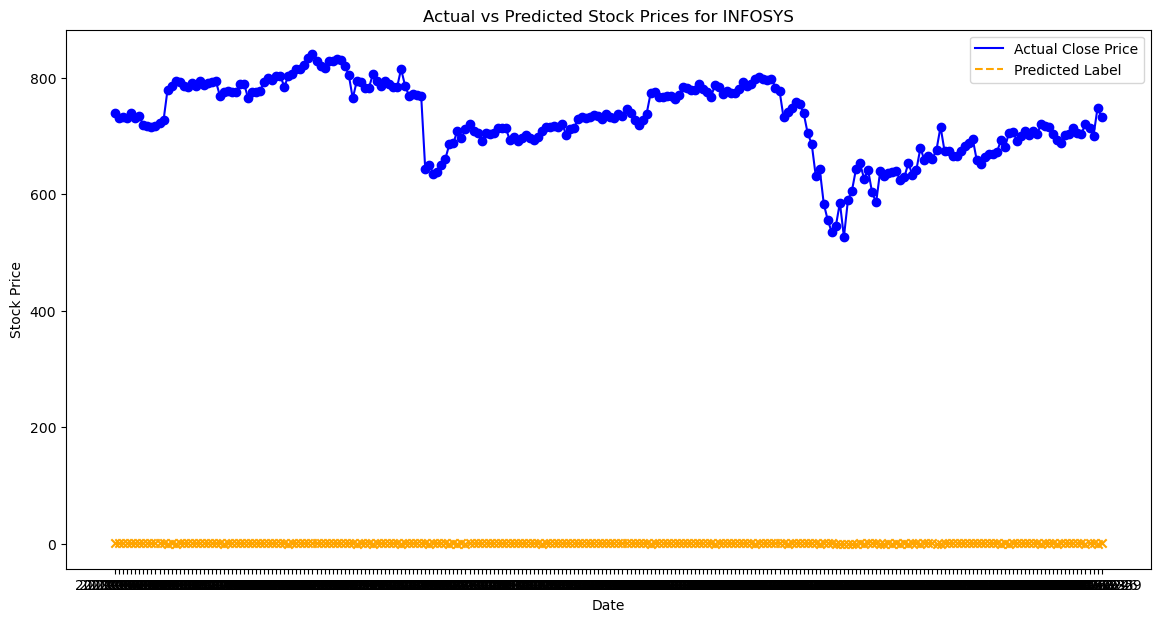

In [2]:
# Get predicted labels for the test set
Y_pred = model.predict(X_test)

# Create a DataFrame for actual and predicted prices
predictions_df = pd.DataFrame({'Date': INFOSYS['Date'][split:], 'Actual_Close': INFOSYS['Close'][split:], 'Predicted_Label': Y_pred})

# Plotting the actual and predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Date'], predictions_df['Actual_Close'], label='Actual Close Price', color='blue')
plt.scatter(predictions_df['Date'], predictions_df['Actual_Close'], marker='o', color='blue')  # Scatter plot for actual prices
plt.plot(predictions_df['Date'], predictions_df['Predicted_Label'], label='Predicted Label', linestyle='dashed', color='orange')
plt.scatter(predictions_df['Date'], predictions_df['Predicted_Label'], marker='x', color='orange')  # Scatter plot for predicted labels
plt.title('Actual vs Predicted Stock Prices for INFOSYS')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
